In [68]:
import sys
import json
from pathlib import Path
from math import pi

import requests
from shapely.geometry import shape, Point
import geopandas as gpd
import spectra

sys.path.append('.')

import gtfs_tools as gt


DATA_DIR = Path('../data')
OUT_DIR = Path('../output')

%matplotlib inline

# Problem 2

In [113]:
# Played around with https://mapzen.com/mobility/explorer/ and copied API query

url = 'https://matrix.mapzen.com/isochrone'
query = {"locations":[{"lat":"-36.84466680273936","lon":"174.7675895690918"}],"costing":"pedestrian","denoise":0.3,"polygons":True,"generalize":50,"costing_options":{"pedestrian":{"use_ferry":0}},"contours":[{"time":60}]}
api_key = 'valhalla-Mc6zgDA'
params = {'json': json.dumps(query), 'api_key': api_key}
r = requests.get(url, params=params)
r.json()
json.dumps(r.json())


'{"features": [{"geometry": {"type": "Polygon", "coordinates": [[[174.675064, -36.786152], [174.671448, -36.786274], [174.670135, -36.787575], [174.671448, -36.788883], [174.673508, -36.789131], [174.673996, -36.790443], [174.675278, -36.790977], [174.675598, -36.796085], [174.677109, -36.796623], [174.677307, -36.803421], [174.678879, -36.803856], [174.67897, -36.821655], [174.680573, -36.82185], [174.680756, -36.823475], [174.682388, -36.823666], [174.682571, -36.825294], [174.687714, -36.825436], [174.687988, -36.827122], [174.694962, -36.827255], [174.695175, -36.828953], [174.707626, -36.829079], [174.707825, -36.830791], [174.722092, -36.830898], [174.722275, -36.832623], [174.736557, -36.832718], [174.736725, -36.834454], [174.740219, -36.834557], [174.738525, -36.83477], [174.738373, -36.838303], [174.734924, -36.838398], [174.734756, -36.84013], [174.729553, -36.840263], [174.729538, -36.850666], [174.731216, -36.850815], [174.731354, -36.852482], [174.733047, -36.852695], [17

# Problem 3

In [36]:
path = DATA_DIR/'auckland_gtfs_20161017.zip'
feed = gt.read_gtfs(path)


In [37]:
s = feed['stops']
cond = s['stop_name'].str.contains('train', case=False)
cond &= s['parent_station'].isnull()
cond &= s['location_type'] == 0
train_stations = s[cond].copy()
train_stations

,stop_lat,zone_id,stop_lon,stop_id,parent_station,stop_desc,stop_name,location_type,stop_code
738,-37.01346,NaN,174.87467,0099,NaN,NaN,Homai Train Station,0,99
739,-37.02327,NaN,174.89617,0098,NaN,NaN,Manurewa Train Station,0,98
740,-37.06429,NaN,174.94611,0097,NaN,NaN,Papakura Train Station,0,97
903,-37.20331,NaN,174.91016,0134,NaN,NaN,Pukekohe Train Station,0,134
905,-36.89778,NaN,174.84967,0130,NaN,NaN,Panmure Train Station,0,130
906,-36.84429,NaN,174.76848,0133,NaN,NaN,Britomart Train Station,0,133
1263,-36.89848,NaN,174.80811,0112,NaN,NaN,Ellerslie Train Station,0,112
1264,-36.88966,NaN,174.79742,0113,NaN,NaN,Greenlane Train Station,0,113
1265,-36.93454,NaN,174.83130,0111,NaN,NaN,Westfield Train Station,0,111
1266,-36.86243,NaN,174.80950,0116,NaN,NaN,Orakei Train Station,0,116


# Problem 4

In [109]:
def get_walking_catchment(lon, lat, distance=1, polygons=True):
    """
    Issue a GET request to the Mapzen Isochrone API to get an approximation
    of the distance ``distance`` kilometer walking catchment centered at the 
    given WGS84 longitude and latitude.
    
    Return the result as a (decoded) GeoJSON Feature, which will contain 
    the catchment as a polygon if ``polygons``; otherwise the catchment boundary
    will be represented by a linestring.
    """
    url = 'https://matrix.mapzen.com/isochrone'
    api_key = 'valhalla-Mc6zgDA'
    query = {
        'locations':[{'lon': lon, 'lat':lat}],
        'polygons': polygons,
        'costing': 'pedestrian',
        'costing_options': {'pedestrian': {'walking_speed': 5.0, 'use_ferry': 0}},
        'contours': [{'time': 12*distance}],
        'denoise': 0.3,  
        'generalize': 50,
    }
    params = {'api_key': api_key, 'json': json.dumps(query) }
    r = requests.get(url, params=params)
    collection = r.json()
    return collection['features'][0]

lon = 174.76848
lat = -36.84429
json.dumps(get_walking_catchment(lon, lat, distance=2))

'{"geometry": {"type": "Polygon", "coordinates": [[[174.776031, -36.837906], [174.777237, -36.837906], [174.777405, -36.841217], [174.779037, -36.841526], [174.779358, -36.843197], [174.779984, -36.841843], [174.781158, -36.84153], [174.782349, -36.841843], [174.782974, -36.84333], [174.785706, -36.84391], [174.786591, -36.845188], [174.788452, -36.844772], [174.789459, -36.845566], [174.790451, -36.84845], [174.788193, -36.850262], [174.784775, -36.852074], [174.781174, -36.856636], [174.775726, -36.85651], [174.773926, -36.859074], [174.77211, -36.858356], [174.763077, -36.860134], [174.760773, -36.859798], [174.757706, -36.857445], [174.755753, -36.857494], [174.754486, -36.85207], [174.749756, -36.850262], [174.748398, -36.842823], [174.752426, -36.841442], [174.754044, -36.838615], [174.75946, -36.839844], [174.761337, -36.839481], [174.76149, -36.837841], [174.76828, -36.837814], [174.768402, -36.8395], [174.770142, -36.839581], [174.770309, -36.841297], [174.770752, -36.839855],

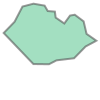

In [110]:
w = get_walking_catchment(lon, lat)
shape(w['geometry'])

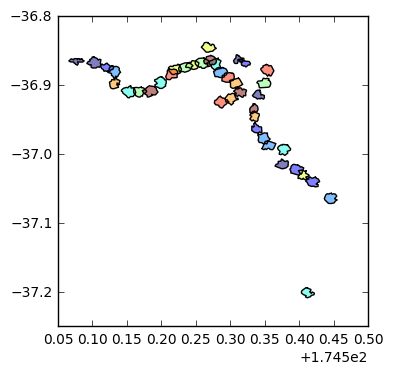

In [114]:
# Collect all walking catchments in a geodataframe.

WGS84_CRS = {'init': 'epsg:4326'}
NZTM_CRS = {'no_defs': True, 'init': 'epsg:2193'}

def my_apply(row):
    lon, lat = row
    w = get_walking_catchment(lon, lat)
    return shape(w['geometry'])
    
f = train_stations.copy()
f['geometry'] = f[['stop_lon', 'stop_lat']].apply(my_apply, axis=1)
f = gpd.GeoDataFrame(f[['stop_name', 'stop_lon', 'stop_lat', 'geometry']], crs=WGS84_CRS)
walking_catchments = f.copy()
f.plot()

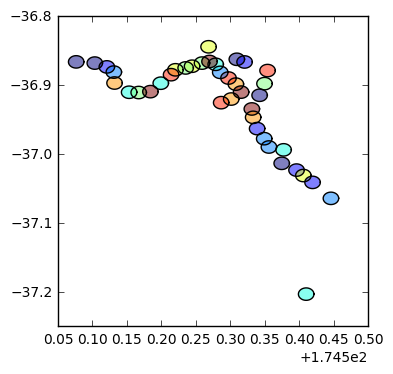

In [115]:
# Collect all flying catchments in a geodataframe.
    
f = train_stations.copy()
f['geometry'] = f[['stop_lon', 'stop_lat']].apply(lambda row: Point(*row), axis=1)
f = gpd.GeoDataFrame(f[['stop_name', 'stop_lon', 'stop_lat', 'geometry']], crs=WGS84_CRS)
f = f.to_crs(NZTM_CRS)
f['geometry'] = f['geometry'].buffer(1000)
f = f.to_crs(WGS84_CRS)
flying_catchments = f.copy()
f.plot()

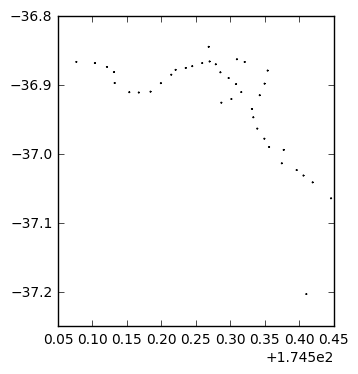

In [116]:
# Collect train stations into geodataframe

f = train_stations.copy()
f['geometry'] = f[['stop_lon', 'stop_lat']].apply(lambda row: Point(*row), axis=1)
f = gpd.GeoDataFrame(f[['stop_name', 'stop_lon', 'stop_lat', 'geometry']], crs=WGS84_CRS)
# Buffer some to form polygons
f['geometry'] = t['geometry'].to_crs(NZTM_CRS).buffer(20).to_crs(WGS84_CRS)
train_stations = f.copy()
f.plot()

# Problem 5

In [117]:
walking_catchments['area_ratio'] = walking_catchments.to_crs(NZTM_CRS)['geometry'].area/(pi*1000**2) 
walking_catchments

,stop_name,stop_lon,stop_lat,geometry,area_ratio
738,Homai Train Station,174.87467,-37.01346,"POLYGON ((174.875229 -37.007957, 174.877594 -3...",0.522511
739,Manurewa Train Station,174.89617,-37.02327,"POLYGON ((174.898285 -37.016228, 174.900803 -3...",0.681953
740,Papakura Train Station,174.94611,-37.06429,"POLYGON ((174.946564 -37.057079, 174.947922 -3...",0.622461
903,Pukekohe Train Station,174.91016,-37.20331,"POLYGON ((174.912048 -37.194592, 174.917023 -3...",0.489039
905,Panmure Train Station,174.84967,-36.89778,"POLYGON ((174.855591 -36.890587, 174.855881 -3...",0.613814
906,Britomart Train Station,174.76848,-36.84429,"POLYGON ((174.767593 -36.838326, 174.768326 -3...",0.592849
1263,Ellerslie Train Station,174.80811,-36.89848,"POLYGON ((174.811844 -36.889858, 174.813614 -3...",0.619184
1264,Greenlane Train Station,174.79742,-36.88966,"POLYGON ((174.802963 -36.882847, 174.804749 -3...",0.602659
1265,Westfield Train Station,174.83130,-36.93454,"POLYGON ((174.835449 -36.927303, 174.839493 -3...",0.368507
1266,Orakei Train Station,174.80950,-36.86243,"POLYGON ((174.811722 -36.857132, 174.813232 -3...",0.308214


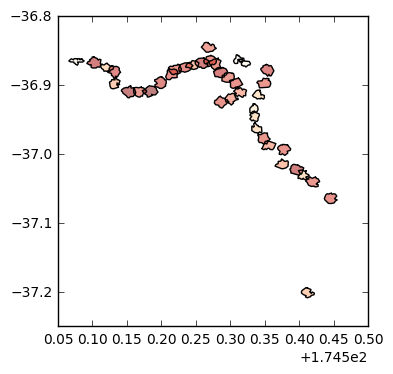

In [118]:
walking_catchments.plot(column='area_ratio', cmap='OrRd')

# Problem 6

In [119]:
# Color-code by area ratio using Spectra

w = walking_catchments.copy()
cuts = [0, 0.25, 0.5, 0.75, 1]
colors = reversed(['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'])
scale = spectra.scale(colors).colorspace('lch').domain(cuts)
w['fill'] = w['area_ratio'].map(lambda x: scale(x).hexcode)
w['fill-opacity'] = 0.8

f = flying_catchments.copy()
f['fill'] = 'gray'
f['fill-opacity'] = 0.3

t = train_stations.copy()

# Export to GeoJSON and plot in geojsonio for a closer look  
path = OUT_DIR/'walking_catchments.geojson'
geo = w.to_json()
with path.open('w') as tgt:
    tgt.write(geo)
    
path = OUT_DIR/'flying_catchments.geojson'
geo = f.to_json()
with path.open('w') as tgt:
    tgt.write(geo)

path = OUT_DIR/'train_stations.geojson'
geo = t.to_json()
with path.open('w') as tgt:
    tgt.write(geo)
